In [9]:

import numpy as np 
from glob import glob 
import matplotlib 

import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 

"""
layers="/data/kleinrl/Wholebrain2.0/ANAT/ANAT_working_recon-all/ANAT_mri_make_surf/LAYNII_2/layers/grow_leaky_loituma/equi_volume_layers_n10.nii"
layers="/data/NIMH_scratch/kleinrl/gdown/sub-02_layers.nii"

cd /data/NIMH_scratch/kleinrl/analyses/wb3/ALL/pca_num5_all10_nomask/fsl_feat_1010.L_FEF_pca5/DAY0/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.2D.pca_000/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO-ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.feat

LN2_todataframe.py --input stats/zstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 
LN2_todataframe.py --input stats/tstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 
LN2_todataframe.py --input stats/pe1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 

LN2_todataframe.py --input thresh_zstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 


cd $out_dir 


LN2_todataframe.py --input thresh_zstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 
LN2_todataframe.py --input thresh_zstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 
LN2_todataframe.py --input thresh_zstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 


LN2_todataframe.py --input sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_000.1D-CORR.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 


"""


#dfs = glob(dataframe_dir+"/*")

lab_dict_full = pd.read_csv("/home/kleinrl/projects/laminar_fmri/tools/LUT_hcp-mmp-b_v2.txt",sep=" ", header=None, names=["id", "lab", "a", "b", "c","d"])
lab_dict_full = dict(zip(lab_dict_full['id'].to_list(), lab_dict_full['lab'].to_list()))

lab_dict = {
1090:"L_10pp",
#1088:"L_10v", 
#1065:"L_10r", 
#1072:"L_10d",  
1087:"L_9a",  
#1071:"L_9p",  
#1069:"L_9m",  
#1086:"L_9-46d",  
1070:"L_8BL",  
#1063:"L_8BM",  
#1067:"L_8Av",  
#1073:"L_8C",  
#1068:"L_8Ad",  
1010:"L_FEF",  
#1042:"L_7AL",  
#1047:"L_7PC",  
1046:"L_7PL",  
#1029:"L_7Pm",  
#1045:"L_7Am",  
#1030:"L_7m",  
1006:"L_V4",  
#1007:"L_V8",  
#1016:"L_V7",  
#1003:"L_V6",  
1153:"L_V6A",  
1023:"L_MT",  

#8109:"lh.LGN",  

1001:"L_V1",  
#1004:"L_V2",  
1005:"L_V3",  
#1013:"L_V3A",  
#1019:"L_V3B",  
#1159:"L_V3CD",  

#1048:"L_LIPv",  
1095:"L_LIPd", 
}
inv_lab_dict = {v: k for k, v in lab_dict.items()}

ids, labs = [],[]
for k,v in lab_dict.items():
    ids.append(k), labs.append(v)


len_x = 3
len_y = 5


work_dir="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_working_TR5"
dataframe_dir=work_dir+"/dataframes"

plot_dir=work_dir+"/plots_compare_fslfeat_3dtcorr_3Ddeconvolve"

os.makedirs(plot_dir, exist_ok=True)


fsl_base="/data/NIMH_scratch/kleinrl/analyses/wb3/ALL/pca_num5_all10_nomask/fsl_feat_1010.L_FEF_pca5/DAY0/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.2D.pca_000/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO-ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.feat/"
#pca000
# fsl_zstat_thresh=fsl_base+"thresh_zstat1.nii.gz"
# fsl_pe=fsl_base+"/stats/pe1.nii.gz"
# fsl_tstat=fsl_base+"/stats/tstat1.nii.gz"
# fsl_zstat=fsl_base+"/stats/zstat1.nii.gz"


df_tstat=glob(fsl_base+"/stats/tstat1*.npy")[0]
df_zstat=glob(fsl_base+"/stats/zstat1*.npy")[0]
df_pe=glob(fsl_base+"/stats/pe*.npy")[0]
df_thresh_zstat=glob(fsl_base+"/thresh_zstat*.npy")[0]


#pca000 - raw 
out_dir="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_comparisons/out"


#raw 
raw_corr=out_dir+'/raw_pca000_v2/sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_000.1D-CORR-sub-02_layers-derivatives-sub-02-atlas-HCP-kenshu-means.npy'
df_corr=glob(raw_corr)[0]

df_corr_deconv_coefs=glob(out_dir+'/raw_pca000_v2/deconv_Coef*.npy')[0]
df_corr_deconv_fstat=glob(out_dir+'/raw_pca000_v2/deconv_Fstat*.npy')[0]
df_corr_deconv_fullr2=glob(out_dir+'/raw_pca000_v2/deconv_FULLR2*.npy')[0]

# preprocessed
preprocd_corr=out_dir+"/prewhitened_pca000_v2/prewhitened_sub-02_ses-04_task-movie_run-04_VASO-prewhitened_sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_000.1D-CORR-sub-02_layers-derivatives-sub-02-atlas-HCP-kenshu-means.npy"
df_corr_preproc=glob(preprocd_corr)[0]

df_corr_preproc_deconv_coefs=glob(out_dir+'/prewhitened_pca000_v2/deconv_Coef*.npy')[0]
df_corr_preproc_deconv_fstat=glob(out_dir+'/prewhitened_pca000_v2/deconv_Fstat*.npy')[0]
df_corr_preproc_deconv_fullr2=glob(out_dir+'/prewhitened_pca000_v2/deconv_FULLR2*.npy')[0]





In [10]:




d_zstat_thresh  = np.load(df_thresh_zstat)[:,1:] #[target_id, : ]
d_zstat         = np.load(df_zstat)[:,1:] #[target_id, : ]
d_tstat         = np.load(df_tstat)[:,1:] #[target_id, : ]

d_corr           = np.load(df_corr)[:,1:] #[target_id, : ]

d_corr_deconv_coefs=np.load(df_corr_deconv_coefs)[:,1:]
d_corr_deconv_fstat=np.load(df_corr_deconv_fstat)[:,1:]
d_corr_deconv_fullr2=np.load(df_corr_deconv_fullr2)[:,1:] 


# preprocessed
d_corr_preproc=np.load(df_corr_preproc)[:,1:]

d_corr_preproc_deconv_coefs=np.load(df_corr_preproc_deconv_coefs)[:,1:]
d_corr_preproc_deconv_fstat=np.load(df_corr_preproc_deconv_fstat)[:,1:]
d_corr_preproc_deconv_fullr2=np.load(df_corr_preproc_deconv_fullr2)[:,1:]


num = np.isnan(d_zstat_thresh).sum(axis=1)
num_ind = (num < 7) & (num > 5 )
lab_inds = np.where(num_ind)

rois_to_plot  = [ lab_dict_full[l] for l in lab_inds[0] ]





['L_24dd', 'L_9p', 'L_PFt', 'L_PH', 'R_V4', 'R_PF']
1001
[nan nan nan nan nan nan nan]
[-0.27986122 -0.16612003 -0.17433058 -0.22901934 -0.1543249  -0.23844151
 -0.11003316]
[-0.28151423 -0.16715588 -0.17554176 -0.23039175 -0.15521279 -0.24000112
 -0.11089311]
[nan nan nan nan nan nan nan]
[-0.24452838 -0.18934961 -0.0728571  -0.36743284 -0.49865586 -0.52359319
 -0.22428534]
[-0.24582015 -0.19001064 -0.0727871  -0.36919649 -0.50146642 -0.52710515
 -0.22576403]
[nan nan nan nan nan nan nan]
[-0.22096419 -0.25085864 -0.53061177 -0.60095016 -0.53122649 -0.39421929
 -0.2553036 ]
[-0.22191965 -0.25227785 -0.53356992 -0.60471245 -0.53418042 -0.39641146
 -0.25699072]
[       nan 2.30294627 2.28193331 2.48927593 2.44856054 2.13731956
        nan]
[-0.17446854 -0.06125584 -0.23680227 -0.30446978 -0.23609974 -0.11673164
 -0.04449066]
[-0.17547955 -0.06177176 -0.23847748 -0.3063582  -0.23753313 -0.11784845
 -0.04480944]
[2.49749305 2.13391602 2.1487649  2.43481231 2.31300231 2.51488829
 2.5553680

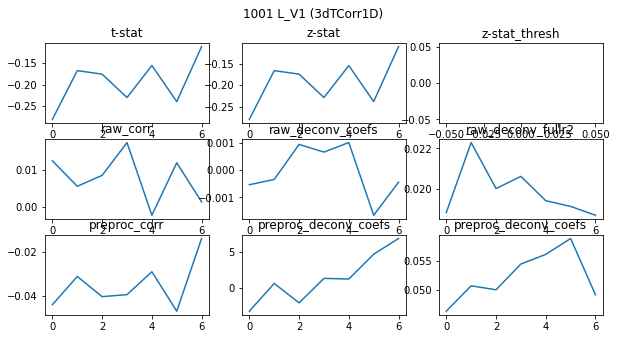

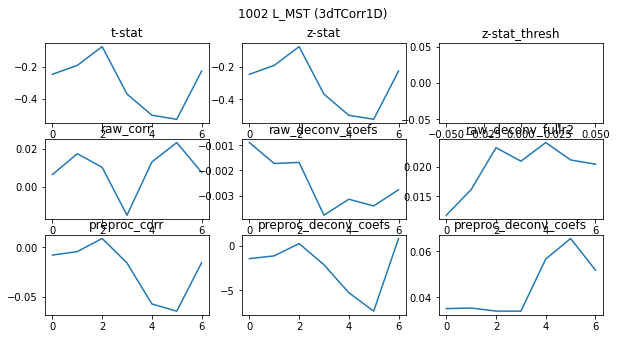

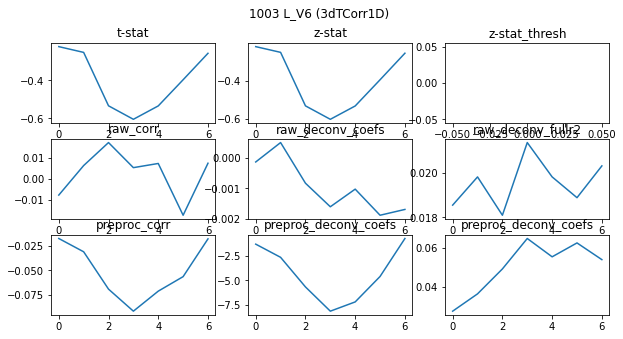

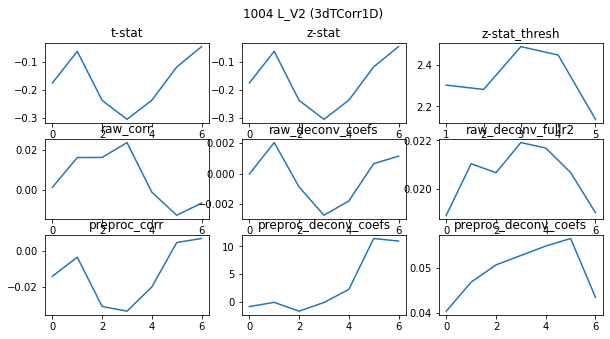

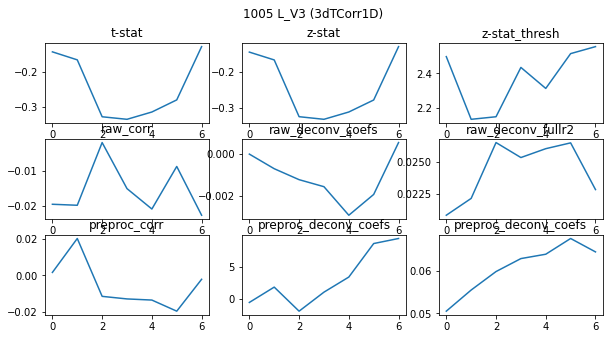

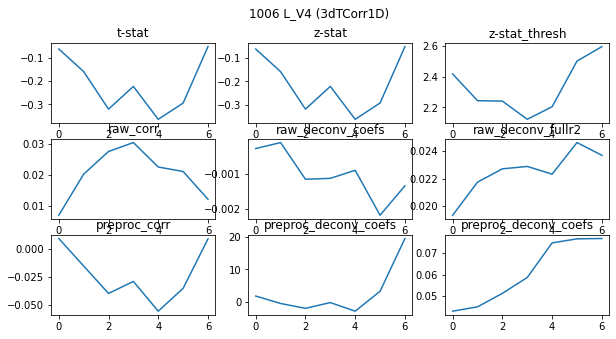

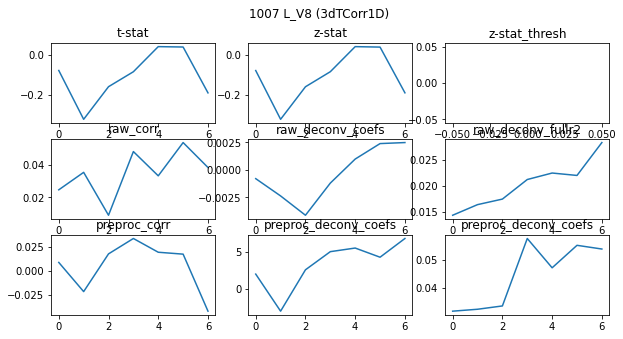

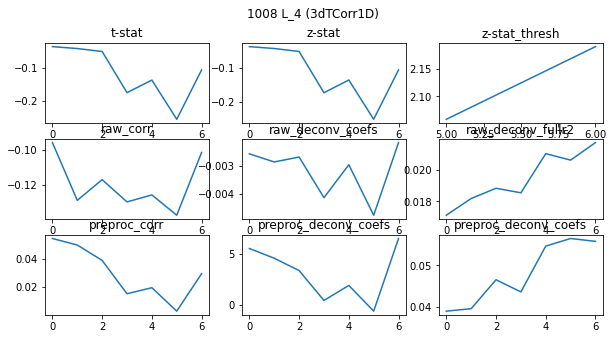

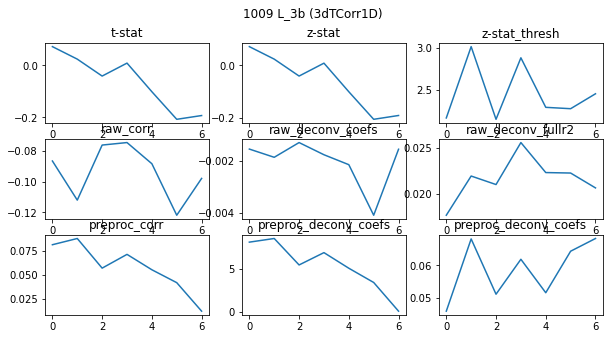

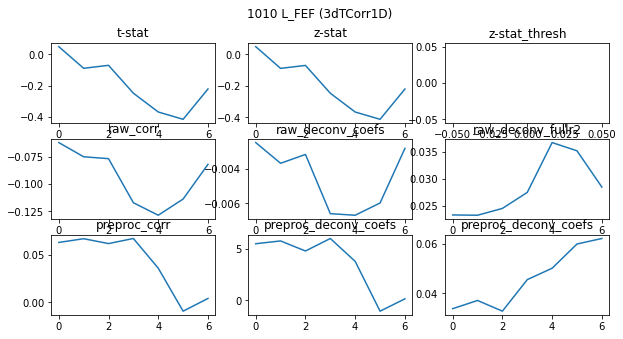

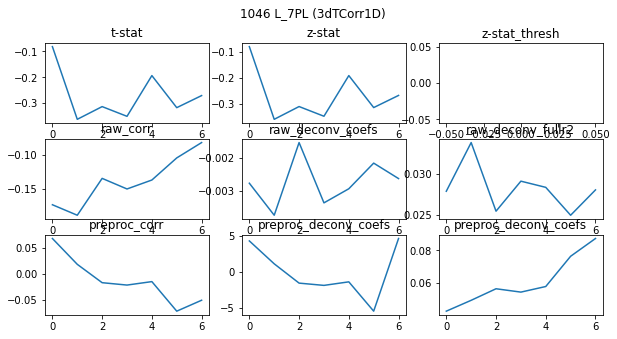

In [14]:
print(rois_to_plot)
print(lab_inds[0])

                        #layout="constrained")


lab_inds = [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1046] 
#lab_inds = lab_inds[0]
for target_id in lab_inds:

    target_lab = lab_dict_full[ target_id ]

    #target_id=lab_inds[0][0]
    fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10,5)) #, #len_x,len_y
    fig.suptitle('{} {} (3dTCorr1D) '.format(target_id, target_lab))
    #fig.suptitle("corr")

    d_zstat_thresh  = np.load(df_thresh_zstat)[:,1:][target_id, : ]
    d_zstat         = np.load(df_zstat)[:,1:][target_id, : ]
    d_tstat         = np.load(df_tstat)[:,1:][target_id, : ]


    d_corr                  =np.load(df_corr)[:,1:][target_id, : ]
    d_corr_deconv_coefs     =np.load(df_corr_deconv_coefs)[:,1:][target_id, : ]
    #d_corr_deconv_fstat     =np.load(df_corr_deconv_fstat)[:,1:][target_id, : ]
    d_corr_deconv_fullr2    =np.load(df_corr_deconv_fullr2)[:,1:] [target_id, : ]

    # preprocessed
    d_corr_preproc              =np.load(df_corr_preproc)[:,1:][target_id, : ]
    d_corr_preproc_deconv_coefs =np.load(df_corr_preproc_deconv_coefs)[:,1:][target_id, : ]
    #d_corr_preproc_deconv_fstat =np.load(df_corr_preproc_deconv_fstat)[:,1:][target_id, : ]
    d_corr_preproc_deconv_fullr2=np.load(df_corr_preproc_deconv_fullr2)[:,1:][target_id, : ]




    print(d_zstat_thresh)
    print(d_zstat)
    print(d_tstat)


    axs[0,0].plot(d_tstat)
    axs[0,0].title.set_text("t-stat")

    axs[0,1].plot(d_zstat)
    axs[0,1].title.set_text("z-stat")

    axs[0,2].plot(d_zstat_thresh)
    axs[0,2].title.set_text("z-stat_thresh")

    axs[1,0].plot(d_corr)
    axs[1,0].title.set_text("raw_corr")
    
    axs[1,1].plot(d_corr_deconv_coefs)
    axs[1,1].title.set_text("raw_deconv_coefs")
    
    axs[1,2].plot(d_corr_deconv_fullr2)
    axs[1,2].title.set_text("raw_deconv_fullr2")

    axs[2,0].plot(d_corr_preproc)
    axs[2,0].title.set_text("preproc_corr")
    
    axs[2,1].plot(d_corr_preproc_deconv_coefs)
    axs[2,1].title.set_text("preproc_deconv_coefs")

    axs[2,2].plot(d_corr_preproc_deconv_fullr2)
    axs[2,2].title.set_text("preproc_deconv_coefs")



In [ ]:

import numpy as np 
from glob import glob 
import matplotlib 

import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 


work_dir="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_working_TR5"
dataframe_dir=work_dir+"/dataframes"

plot_dir=work_dir+"/plots_compare_fslfeat_3dtcorr_3Ddeconvolve"

os.makedirs(plot_dir, exist_ok=True)


fsl_base="/data/NIMH_scratch/kleinrl/analyses/wb3/ALL/pca_num5_all10_nomask/fsl_feat_1010.L_FEF_pca5/DAY0/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.2D.pca_000/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO-ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.feat/"

fsl_zstat_thresh=fsl_base+"thresh_zstat1.nii.gz"
fsl_pe=fsl_base+"/stats/pe1.nii.gz"
fsl_tstat=fsl_base+"/stats/tstat1.nii.gz"
fsl_zstat=fsl_base+"/stats/zstat1.nii.gz"

"""
layers="/data/kleinrl/Wholebrain2.0/ANAT/ANAT_working_recon-all/ANAT_mri_make_surf/LAYNII_2/layers/grow_leaky_loituma/equi_volume_layers_n10.nii"
layers="/data/NIMH_scratch/kleinrl/gdown/sub-02_layers.nii"

cd /data/NIMH_scratch/kleinrl/analyses/wb3/ALL/pca_num5_all10_nomask/fsl_feat_1010.L_FEF_pca5/DAY0/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.2D.pca_000/ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO-ds003216-download_derivatives_sub-02_VASO_fun2_sub-02_ses-04_task-movie_run-04_VASO.feat

LN2_todataframe.py --input stats/zstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 
LN2_todataframe.py --input stats/tstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 
LN2_todataframe.py --input stats/pe1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 

LN2_todataframe.py --input thresh_zstat1.nii.gz  --columns  $parc_hcp_kenshu --layers  $layers 

LN2_todataframe.py --input \
/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_comparisons//out/sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.mean-CORR.nii.gz \
--columns  $parc_hcp_kenshu --layers  $layers 

"""

df_zstat=glob(fsl_base+"/stats/tstat1*.npy")[0]
df_tstat=glob(fsl_base+"/stats/zstat1*.npy")[0]
df_pe=glob(fsl_base+"/stats/pe*.npy")[0]
df_thresh_zstat=glob(fsl_base+"/thresh_zstat*.npy")[0]

df_corr="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_comparisons//out/sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.mean-CORR-sub-02_layers-derivatives-sub-02-atlas-HCP-kenshu-means.npy"
df_corr_preproced="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_comparisons//out/sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.mean-CORR-sub-02_layers-derivatives-sub-02-atlas-HCP-kenshu-means.npy"



#dfs = glob(dataframe_dir+"/*")

lab_dict_full = pd.read_csv("/home/kleinrl/projects/laminar_fmri/tools/LUT_hcp-mmp-b_v2.txt",sep=" ", header=None, names=["id", "lab", "a", "b", "c","d"])
lab_dict_full = dict(zip(lab_dict_full['id'].to_list(), lab_dict_full['lab'].to_list()))




# L1 - WM 
# L7 - CSF 

lab_dict = {
1090:"L_10pp",
#1088:"L_10v", 
#1065:"L_10r", 
#1072:"L_10d",  
1087:"L_9a",  
#1071:"L_9p",  
#1069:"L_9m",  
#1086:"L_9-46d",  
1070:"L_8BL",  
#1063:"L_8BM",  
#1067:"L_8Av",  
#1073:"L_8C",  
#1068:"L_8Ad",  
1010:"L_FEF",  
#1042:"L_7AL",  
#1047:"L_7PC",  
1046:"L_7PL",  
#1029:"L_7Pm",  
#1045:"L_7Am",  
#1030:"L_7m",  
1006:"L_V4",  
#1007:"L_V8",  
#1016:"L_V7",  
#1003:"L_V6",  
1153:"L_V6A",  
1023:"L_MT",  

#8109:"lh.LGN",  

1001:"L_V1",  
#1004:"L_V2",  
1005:"L_V3",  
#1013:"L_V3A",  
#1019:"L_V3B",  
#1159:"L_V3CD",  

#1048:"L_LIPv",  
1095:"L_LIPd", 
}

inv_lab_dict = {v: k for k, v in lab_dict.items()}


#inv_lab_dict = {v: k for k, v in lab_dict.items()}
ids, labs = [],[]
for k,v in lab_dict.items():
    ids.append(k), labs.append(v)



# len_x = len(labs)
# len_y = len(labs) 

len_x = 3
len_y = 5

# fig, axs = plt.subplots(ncols=len_x, nrows=len_y, figsize=(30,30), #len_x,len_y
#                         layout="constrained")

target_id=1010


d_zstat_thresh  = np.load(df_thresh_zstat)[:,1:] #[target_id, : ]
d_zstat         = np.load(df_zstat)[:,1:] #[target_id, : ]
d_tstat         = np.load(df_tstat)[:,1:] #[target_id, : ]
d_pe            = np.load(df_pe)[:,1:] #[target_id, : ]





#np.where(np.isnan(d_zstat_thresh).sum(axis=1)<7)


num = np.isnan(d_zstat_thresh).sum(axis=1)
num_ind = (num < 7) & (num > 5 )
lab_inds = np.where(num_ind)

rois_to_plot  = [ lab_dict_full[l] for l in lab_inds[0] ]

#d_zstat_thresh[np.isnan(d_zstat_thresh).sum(axis=1)<7,:].index




In [17]:
print([labs, ids]) 


[['L_10pp', 'L_9a', 'L_8BL', 'L_FEF', 'L_7PL', 'L_V4', 'L_V6A', 'L_MT', 'L_V1', 'L_V3', 'L_LIPd'], [1090, 1087, 1070, 1010, 1046, 1006, 1153, 1023, 1001, 1005, 1095]]
